In [1]:
# import all packages and load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Investigation Overview


> In this investigation we are looking into the factors that make user have longer duration trip, that are related to the user mostly.

## Dataset Overview


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data includes features for the rider such as membership, gender, year of birth. And some other features related to the trip itself, such as the station and start and end time,..etc.

## key Insights From Exploratory Analysis

>- Trip duration distribution is right-skewed, less number of trips are on the longer duration side. 
>- Gender distribution is examined, looks like male are dominating the user database.
>- Customers Versus Subscribers trip behavior is explored, in terms of trip duration and trips frequency. It looks like the user type influence the trip behavior.
>- Age have a relation with trip duration, it is not necessarily a correlation, but there is definetely a pattern.
>- A comindation of age and gender is explored to see its effect on trip duration.

## Preparing data by changing dropping nan values, dropping unncessary columns, and adding age column, finally converting the duration from second to minutes.

In [2]:
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df.dropna(inplace=True)
df['age'] = 2021 - df['member_birth_year']
df['duration_min'] = df['duration_sec'] / 60


In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,37.0,869.750000
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,49.0,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,32.0,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,47.0,26.416667
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,62.0,29.883333


## The distribution of trip duration

> # We can see that the trip duration average in seconds is at 704, however most trip durations are around 400 seconds.

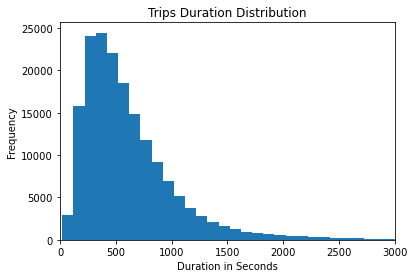

In [4]:
# Trip duration in seconds distribution using histogram

bins = np.arange(20, df['duration_sec'].max()+100,100)
plt.hist(data = df , x = 'duration_sec' , bins = bins);
plt.xlim(0,3000)
plt.title('Trips Duration Distribution');
plt.xlabel('Duration in Seconds');
plt.ylabel('Frequency');

> # The average duration in minutes is 11 minute ride. the longest trip is 1400 minutes.Most trips lie in the 0 - 300 minutes area.

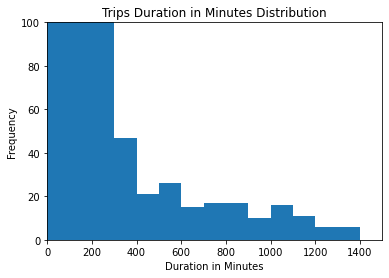

In [5]:
# Trip duration in minutes distribution using histogram

bins = np.arange(0, df['duration_min'].max()+50,100)
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xlim(0,1500)
plt.ylim(0,100)
plt.title('Trips Duration in Minutes Distribution');
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency');

## Gender Distribution

> # Most users are males at 120,000+ compared to only 40,000+ Females.

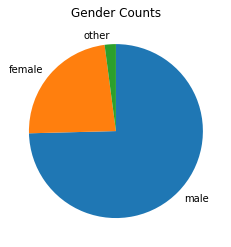

In [7]:
# Gender of users using barchart

gender_counts = df['member_gender'].value_counts()
gender=('male','female','other')
plt.pie(gender_counts, startangle = 90, counterclock = False, labels=gender);
plt.title('Gender Counts');


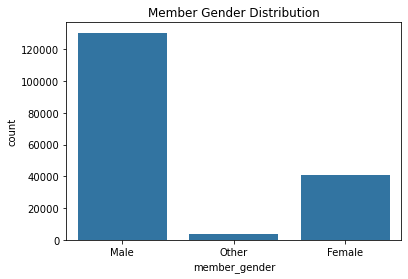

In [8]:
# Gender of users using barplot

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_gender', color = base_color).set(title='Member Gender Distribution');

## User type distribution

> Most users are subscribers at 150,000+ Compared to 16,000+ customers. However, when we compare the trip duration by user, customers tend to take longer trips than subscriber by almost the double. 

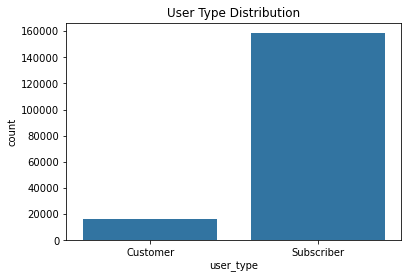

In [9]:
# customers and sucbscribers distribution

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color).set(title='User Type Distribution');

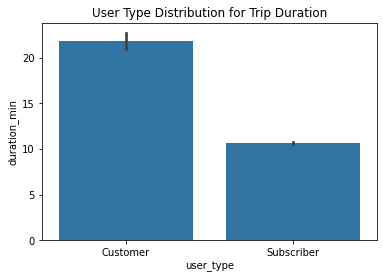

In [10]:
# Trip duration distribution between customers and subscribers.

base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'user_type', y= 'duration_min', color = base_color).set(title='User Type Distribution for Trip Duration');

## Relation between trip duration in minutes and user age

> Most trips lie below 25 minutes and are conducted by members of age 25-35

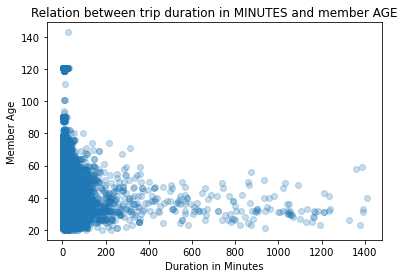

In [11]:
# Plotting data for duration in minutes and adding hue

plt.scatter(data = df, x = 'duration_min', y = 'age', alpha=5/20);
plt.xlabel('Duration in Minutes')
plt.ylabel('Member Age')
plt.title('Relation between trip duration in MINUTES and member AGE');

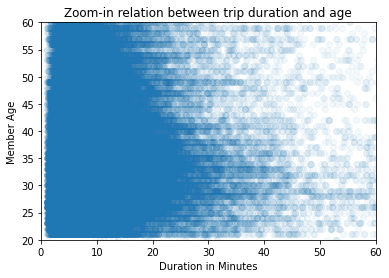

In [12]:
# Zoom-in for duration in minutes

plt.scatter(data = df, x = 'duration_min', y = 'age', alpha=1/20);
plt.ylim(20,60)
plt.xlim(0,60)
plt.xlabel('Duration in Minutes')
plt.ylabel('Member Age')
plt.title('Zoom-in relation between trip duration and age');

## Relation between age and gender

> The age of users for both genders have similar bracket for 25-75% of the users. Male users have a slightly wider bracket it starts at 29 - 41, while females start almost a year younger and is a couple of years less than 40.

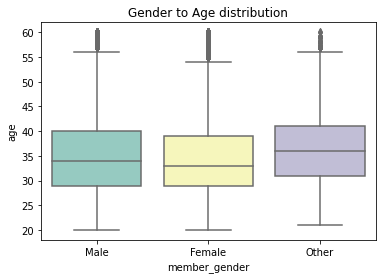

In [31]:
# Plotting age and gender of users after removing outliers

x = sb.boxplot(data=df, x='member_gender', y='age', palette="Set3").set_title('Gender to Age distribution');

## relation between age, gender, and trip duration

> As we can see that the is no certain correlation between age and trip duration for each gender. We can see that most trips, as observed earlier, have a duration between 0 - 60 minutes. Males have more datapoints around the age 30-40 with higher durations reaching 100 minutes. Females though are more between 25 - 35.

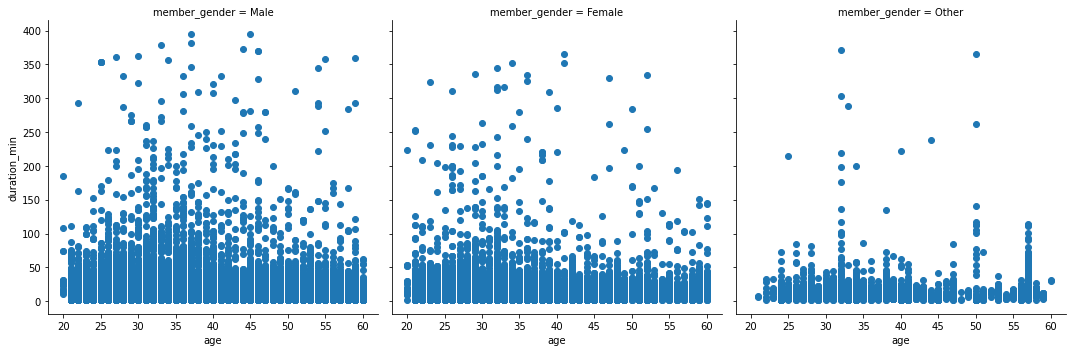

In [14]:
# Plotting the duration and age for each gender, using a scatterplot. 
# Setting the limit to maximum age of 60 and trip duration to 40

df = df.query('age <= 60')
df = df.query('duration_min <= 400')

g = sb.FacetGrid(data = df, col = 'member_gender', height=5,
                margin_titles = True)
g.map(plt.scatter, 'age', 'duration_min');

# Summary

> ### The characteristics of riders can influence to an extent the trip duration, the mid age of 25-40 in general is a prime bracket when it comes to longer durations, males and females have a slight difference in a way that males continue to maintain longer trip at higher age. The one thing that is also a great influnce which should be kept in mind and maybe explored furrther is the fact that customers tend to take longer trips than subscribers. Which means that a huge factor for the trip duration is the fact that customers make use of their less frequent trip than subscribers who take shorter trips but more frequently.

In [32]:
!jupyter nbconvert Communicate-data-findings-Slides.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Communicate-data-findings-Slides.ipynb to slides
[NbConvertApp] Writing 874914 bytes to Communicate-data-findings-Slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\maggi\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\maggi\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\maggi\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\maggi\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\maggi\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook